In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
after_camping = pd.read_excel("data/코로나이후_차박캠핑.xlsx")

In [3]:
after_camping.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/ubin1024?Redirect=Log&l...,2020.08.14.,현대차 더 뉴 싼타페 캠핑(차박) 및 시승기,"['#캠핑', '#차박', '#캠핑차박', '#팰리세이드', '#더뉴싼타페', '#...",['\n\n\n\n바야흐로~ #캠핑 의 시대요 #차박 의 계절입니다 ... 사실 국...
1,https://blog.naver.com/sukboo74?Redirect=Log&l...,2020.06.08.,152번째 구조라해수욕장 차박캠핑 (2020.06.05~2020.06.06),"['#차박캠핑', '#스텔스차박', '#거제도', '#구조라해수욕장', '#구조라차...",['\n\n\n\n하남체육공원->작원관지->삼랑진생태문화공원->구조라해수욕장2020...
2,https://blog.naver.com/atlas100?Redirect=Log&l...,2020.07.28.,산 아래가 훤히 내려다보이는 멋진 곳에서 노지캠핑[차박캠핑],"['#노지캠핑', '#차박캠핑', '#아이오닉차박', '#산정상노지', '#노지추천...",['\n\n\n\n노지캠핑[차크닉]을 산꼭대기는 아니지만 마치 산꼭대기에서 있는 지...
3,https://blog.naver.com/azharea?Redirect=Log&lo...,2020.08.04.,강원도 삼척 맹방해수욕장 차박캠핑,"['#강원도삼척', '#맹방해수욕장', '#차박캠핑', '#카라반의성지', '#덕산...",['\n\n\n\n\u200b\u200b\u200b월요일부터 휴가시작이기에 여유있게...
4,https://blog.naver.com/00sweetlove?Redirect=Lo...,2020.07.10.,차박 캠핑 으로 딱인 장소 횡성 섬강유원지 추천,"['#차박', '#차박캠핑', '#차박장소추천', '#섬강', '#섬강유원지', '...",['\n\n\n\n\u200b\u200b차박 캠핑은 차에서 잠도 자고 캠핑도 즐기는...


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
after_camping["hashtags"] = after_camping["hashtags"].apply(ast.literal_eval)
after_camping["contents"] = after_camping["contents"].apply(ast.literal_eval)

In [5]:
after_camping = after_camping[(after_camping["hashtags"].str.len() != 0) | (after_camping["contents"].str.len() != 0)]

In [6]:
len(after_camping)

1989

- hashtags랑 contents 데이터 합치기

In [7]:
after_camping["info"] = after_camping["hashtags"] + after_camping["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사 추출

In [8]:
after_camping["info"] = after_camping["info"].map(lambda x: ' '.join(x))

In [9]:
after_camping["info"] = after_camping["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [10]:
okt = Okt()
after_camping["info"] = after_camping["info"].map(lambda x: okt.nouns(x))

In [11]:
after_camping["info"]

0       [캠핑, 차박, 캠핑, 차박, 팰리세이드, 더뉴, 싼타페, 전기차, 자동차, 크리에...
1       [차박캠핑, 스텔스, 차박, 거제도, 구조라해수욕장, 구조, 라차, 박, 관, 하남...
2       [노지, 캠핑, 차박캠핑, 아이오, 닉차박, 산정, 상노, 노지, 추천, 저수지, ...
3       [강원도, 삼척, 맹방, 해수욕장, 차박캠핑, 카라반, 성지, 덕산, 해변, 평, ...
4       [차박, 차박캠핑, 차박, 장소, 추천, 섬강, 섬강, 유원지, 횡성, 섬강, 유원...
                              ...                        
1994    [조상, 규, 변호사, 주강, 섬, 캠핑, 노지, 캠핑, 패킹, 차박캠핑, 캠린, ...
1995    [파, 주차, 박, 파주, 노지, 캠핑, 파주, 캠핑, 파주, 캠핑장, 파주, 무료...
1996    [노지, 캠핑, 차박캠핑, 법, 공원, 남, 한강, 노지, 캠핑, 무료, 캠핑, 장...
1997    [자충, 매트, 차, 박용, 자충, 매트, 차박캠핑, 에어, 매트, 차박, 매트리스...
1999    [서울, 캠핑, 용품, 매장, 차박, 텐트, 추천, 차박, 텐트, 캠핑, 용품, 고...
Name: info, Length: 1989, dtype: object

# WordCloud

In [12]:
word_tokens = list(after_camping["info"])
word_tokens = sum(word_tokens, [])

In [13]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [14]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

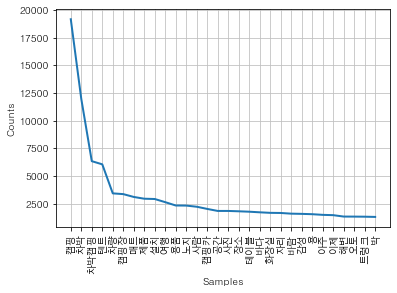

In [15]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

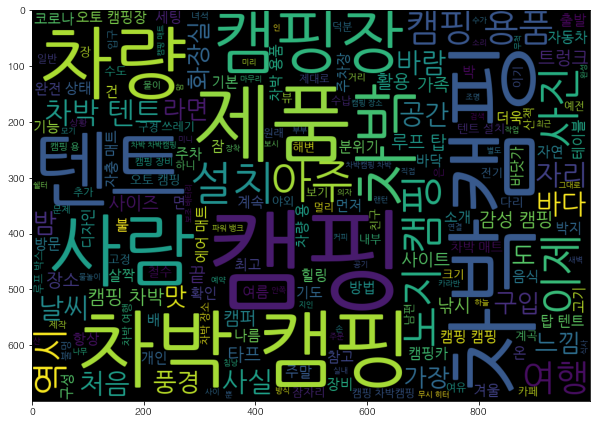

In [16]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('차박캠핑_코로나후.png')

# Word2Vec

In [17]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = after_camping["info"].apply(lambda x: korean_stop_words(x, stop_words))

In [18]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset, sg = 1, window = 10, min_count = 1)
model.init_sims(replace=True)

In [19]:
print("차박캠핑와 차박의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("차박캠핑", "차박")))

차박캠핑와 차박의 단어간 유사도는 0.75 입니다.


In [20]:
print("차박캠핑와 힐링여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("차박캠핑", "힐링여행")))

차박캠핑와 힐링여행의 단어간 유사도는 0.55 입니다.
